# Kaggle - Titanic

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from titanic import *

## Import Data

**Import: `train` data**

In [2]:
filename = 'data/train.csv'
df_train = import_data(filename)
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Import: `test` data**

In [3]:
filename = 'data/test.csv'
df_test = import_data(filename)
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Concatedate `train` and `test` dataframes**

In [4]:
df = concatenate_dataframes(df_train, df_test)

## Feature Creation

In [5]:
df = create_features(df, standardize=True)

In [6]:
df.head(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,granular_grouped_title,title_class,Age
0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,NaN,S,Mr,low,mr,mr_3,-0.560117
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C85,C,Mrs,high,mrs_ms_lady,mrs_ms_lady_1,0.654856
2,1.0,3,"Heikkinen, Miss. Laina",female,0,0,NaN,S,Miss,high,miss,miss_3,-0.256373


In [7]:
df.tail(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,granular_grouped_title,title_class,Age
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,NaN,S,Mr,low,mr,mr_3,0.692824
1307,NaN,3,"Ware, Mr. Frederick",male,0,0,NaN,S,Mr,low,mr,mr_3,-0.259239
1308,NaN,3,"Peter, Master. Michael J",male,1,1,NaN,C,Master,high,master,master_3,-0.259239


## [EDA] `Survival rate` by `Title`

In [8]:
# variable = 'Age'
# flag = df['Survived'].isnull()
# x = df[~flag].groupby(by=[variable]).agg({'Survived':['sum', 'count']})
# x = x.droplevel(level=0, axis=1)
# x['Ratio'] = x['sum']/x['count']
# x

In [9]:
# x = df[flag].groupby(by=[variable]).agg({variable:['count']})
# x = x.droplevel(level=0, axis=1)
# x

## Feature Engineering

### Select Features

In [10]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'title_class', 'Age']
# features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'title_class']
df = select_features(df, features)

In [11]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Title,title_class,Age
0,0.0,3,male,1,0,Mr,mr_3,-0.560117
1,1.0,1,female,1,0,Mrs,mrs_ms_lady_1,0.654856
2,1.0,3,female,0,0,Miss,miss_3,-0.256373


### Transform categorical variables in dummies

In [12]:
# categorical_variables = ['Pclass', 'Title', 'title_class']
categorical_variables = ['Pclass', 'Sex', 'Title', 'title_class']
df = convert_categorical(df, categorical_variables)

In [13]:
df.head(3)

,Survived,SibSp,Parch,Age,Pclass_2,Pclass_3,Sex_male,Title_ Col,Title_ Don,Title_ Dona,...,title_class_miss_3,title_class_mme_mlle,title_class_mr_1,title_class_mr_2,title_class_mr_3,title_class_mrs_ms_lady_1,title_class_mrs_ms_lady_2,title_class_mrs_ms_lady_3,title_class_noble,title_class_rev
0,0.0,1,0,-0.560117,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0.654856,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,0,-0.256373,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Extract `X` and `y` from `train` and `test`

In [14]:
flag = df['Survived'].isnull()
X_train, y_train = extract_X_y(df[~flag])
X_test, y_test = extract_X_y(df[flag])

## Model: Hyperparameter Optimization

### Logistic Regression

In [15]:
model_type = 'LogisticRegression'
gridsearch_lr = train_model(model_type, X_train, y_train)
df = predict(gridsearch_lr, X_test, df, column='LR')
search = gridsearch_output(gridsearch_lr)
search

,params,mean_test_score,std_test_score
0,{'C': 1.25},0.824949,0.054141
1,{'C': 1},0.823813,0.051173
2,{'C': 0.5},0.822677,0.051382
3,{'C': 0.75},0.822677,0.050988
4,{'C': 3},0.822652,0.053030
5,{'C': 1.5},0.821566,0.050766
6,{'C': 0.3},0.818131,0.048040
7,{'C': 0.1},0.805682,0.042774


### Decision Tree Classifier

In [16]:
model_type = 'DecisionTreeClassifier'
gridsearch_dtc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_dtc, X_test, df, column='DTC')
search = gridsearch_output(gridsearch_dtc)
search

,params,mean_test_score,std_test_score
0,{'max_depth': 5},0.821540,0.051615
1,{'max_depth': 4},0.815783,0.049422
2,{'max_depth': 6},0.810303,0.040578
3,{'max_depth': 7},0.805909,0.046038
4,{'max_depth': 10},0.803611,0.054460
5,{'max_depth': 8},0.798106,0.048229
6,{'max_depth': 3},0.797879,0.045605
7,{'max_depth': 9},0.795884,0.057527


### K Neighbors Classifier

In [17]:
model_type = 'KNeighborsClassifier'
gridsearch_knn = train_model(model_type, X_train, y_train)
df = predict(gridsearch_knn, X_test, df, column='KNN')
search = gridsearch_output(gridsearch_knn)
search

,params,mean_test_score,std_test_score
0,{'n_neighbors': 40},0.822677,0.053731
1,{'n_neighbors': 45},0.822652,0.053869
2,{'n_neighbors': 35},0.820429,0.053359
3,{'n_neighbors': 50},0.819268,0.050832
4,{'n_neighbors': 25},0.815985,0.043770
5,{'n_neighbors': 30},0.815985,0.054073


### SVC

In [18]:
model_type = 'SVC'
gridsearch_svc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_svc, X_test, df, column='SVC')
search = gridsearch_output(gridsearch_svc)
search

,params,mean_test_score,std_test_score
0,{'C': 0.1},0.829369,0.048730
1,{'C': 1},0.822601,0.054474
2,{'C': 0.05},0.821540,0.049704
3,{'C': 10},0.821515,0.048899
4,{'C': 0.001},0.616136,0.006747
5,{'C': 0.005},0.616136,0.006747
6,{'C': 0.01},0.616136,0.006747


### Random Forest

In [19]:
model_type = 'RandomForestClassifier'
gridsearch_rf = train_model(model_type, X_train, y_train)
df = predict(gridsearch_rf, X_test, df, column='RF')
search = gridsearch_output(gridsearch_rf)
search

,params,mean_test_score,std_test_score
0,"{'max_depth': 7, 'n_estimators': 175}",0.834975,0.057427
1,"{'max_depth': 7, 'n_estimators': 200}",0.834949,0.060434
2,"{'max_depth': 7, 'n_estimators': 225}",0.831566,0.055746
3,"{'max_depth': 5, 'n_estimators': 175}",0.829369,0.051267
4,"{'max_depth': 5, 'n_estimators': 200}",0.829369,0.050872
5,"{'max_depth': 5, 'n_estimators': 225}",0.829318,0.054381
6,"{'max_depth': 10, 'n_estimators': 225}",0.828283,0.056354
7,"{'max_depth': 10, 'n_estimators': 175}",0.827197,0.057493
8,"{'max_depth': 10, 'n_estimators': 200}",0.823813,0.062312
9,"{'max_depth': 20, 'n_estimators': 200}",0.813763,0.066937


### XGBoost

## Model Selection

### Create models with optimal hyperparameter

In [20]:
lr = LogisticRegression(C=gridsearch_lr.best_params_['C'], penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(max_depth=gridsearch_dtc.best_params_['max_depth'])
knn = KNeighborsClassifier(n_neighbors=gridsearch_knn.best_params_['n_neighbors'])
svc = SVC(C=gridsearch_svc.best_params_['C'])
rf = RandomForestClassifier(max_depth=gridsearch_rf.best_params_['max_depth'], n_estimators=gridsearch_rf.best_params_['n_estimators'])

### Check optimal model by Stratified KFold

In [21]:
n_splits = 20
optimal_kfold = pd.DataFrame(columns=['model', 'accuracy'])
accuracy_df = pd.DataFrame(index=['Logistic', 'DTC', 'KNN', 'SVC', 'RF', 'XGBoost'], columns=['accuracy'])

In [22]:
kf = StratifiedKFold(n_splits=n_splits)
i = 0
for train_index, test_index in kf.split(X_train, y_train):
    
    XX_train, XX_test = X_train.iloc[train_index], X_train.iloc[test_index]
    yy_train, yy_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Logistic
    accuracy_df['accuracy']['Logistic'] = fit_predict_score(lr, XX_train, XX_test, yy_train, yy_test)
    
    # DTC
    accuracy_df['accuracy']['DTC'] = fit_predict_score(dtc, XX_train, XX_test, yy_train, yy_test)
    
    # KNN
    accuracy_df['accuracy']['KNN'] = fit_predict_score(knn, XX_train, XX_test, yy_train, yy_test)
    
    # SVC
    accuracy_df['accuracy']['SVC'] = fit_predict_score(svc, XX_train, XX_test, yy_train, yy_test)
    
    # RandomForest
    accuracy_df['accuracy']['RF'] = fit_predict_score(rf, XX_train, XX_test, yy_train, yy_test)
    
    best_score = accuracy_df['accuracy'].max()
    best_model = accuracy_df[accuracy_df['accuracy'] == best_score].index[0]
    
    optimal_kfold.loc[i] = [best_model]+[best_score]
    i+=1

### Check Results

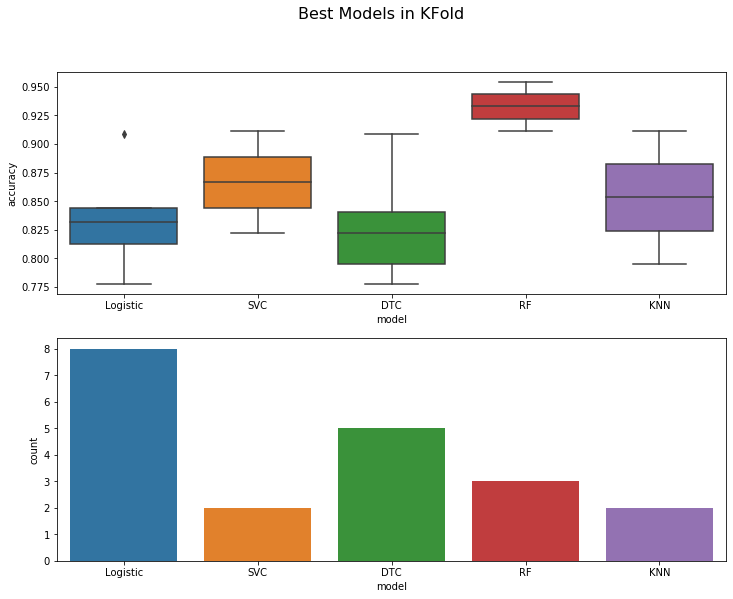

In [23]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
sns.boxplot(x='model', y='accuracy', data=optimal_kfold, ax=ax1)
sns.countplot(optimal_kfold['model'])
plt.suptitle('Best Models in KFold', fontsize=16)
plt.show()

## Predict Evaluation Set

### Run chosen model

In [24]:
model = lr
model.fit(X_train, y_train)
indexes = X_test.index
df_test['Survived'] = np.nan
df_test['Survived'] = model.predict(X_test)

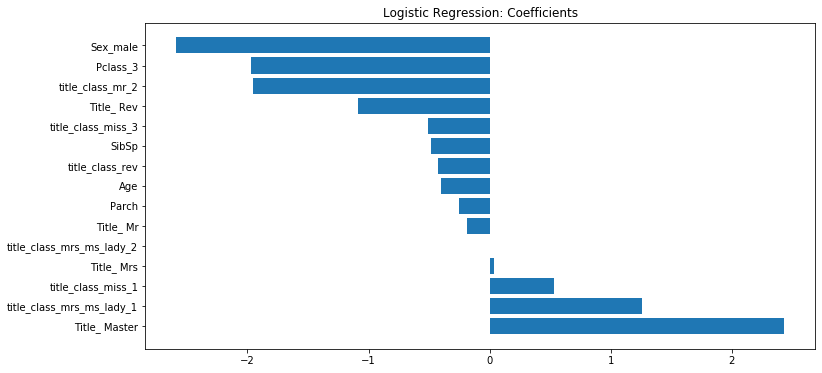

In [25]:
coefs = pd.DataFrame(lr.coef_.T, index=X_train.columns)
coefs.sort_values(0, ascending=False, inplace=True)
flags = abs(coefs[0])>0
plt.figure(figsize=(12, 6))
plt.barh(y=coefs[flags].index, width=coefs[flags][0])
plt.title('Logistic Regression: Coefficients')
plt.show()

### Export to csv

In [26]:
filename = 'output/lr_opt5.csv'
df_test['Survived'] = df_test['Survived'].astype('int')
df_test[['Survived']].to_csv(filename)